<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
## Write your code here
missing_values = df[['JobSat', 'RemoteWork', 'Employment', 'LanguageHaveWorkedWith']].isnull().sum()
print(missing_values)

missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)

# Leaving `JobSat` as NA is preferable because with 55.5% missing data, 
#imputing could introduce bias, skewing the distribution and leading to inaccurate conclusions.

# to preserve the categorical nature of the data, while methods like mean, median, or fill-forward could distort its distribution.
mode_jobsat = df['RemoteWork'].mode()[0]
df['RemoteWork'].fillna(mode_jobsat, inplace=True)

# preserves all data points, preventing bias or misleading conclusions that could result from dropping rows with missing values
df['LanguageHaveWorkedWith'].fillna('Unknown', inplace=True)

JobSat                    36311
RemoteWork                10631
Employment                    0
LanguageHaveWorkedWith     5692
dtype: int64
JobSat                    55.490013
RemoteWork                16.246160
Employment                 0.000000
LanguageHaveWorkedWith     8.698443
dtype: float64


/tmp/ipykernel_1127/2977359560.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(mode_jobsat, inplace=True)
/tmp/ipykernel_1127/2977359560.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [5]:
## Write your code here
#missing_values_yrs = df[['YearsCodePro']].isnull().sum()
#print(missing_values_yrs)
#missing_percentage_yrs = (missing_values_yrs / len(df)) * 100
#print(missing_percentage_yrs)

df['YearsCodePro'].fillna(method='ffill', inplace=True)
df['YearsCodePro'].fillna(method='bfill', inplace=True)

def categorize_experience(years):
    if years == 'Less than 1 year':
        return '0-5 years' 
    elif years == 'More than 50 years':
        return '>20 years'  
    try:
        years = float(years)
    except ValueError:
        return None  
    if years < 5:
        return '0-5 years'
    elif years < 10:
        return '5-10 years'
    elif years < 20:
        return '10-20 years'
    else:
        return '>20 years'

df['ProExperienceRange'] = df['YearsCodePro'].apply(categorize_experience)
print(df[['YearsCodePro', 'ProExperienceRange']].head())

median_job_sat_by_range = df.groupby('ProExperienceRange')['JobSat'].median().reset_index()
print(median_job_sat_by_range)

  YearsCodePro ProExperienceRange
0           17        10-20 years
1           17        10-20 years
2           27          >20 years
3           27          >20 years
4           27          >20 years
  ProExperienceRange  JobSat
0          0-5 years     7.0
1        10-20 years     7.0
2         5-10 years     7.0
3          >20 years     8.0


/tmp/ipykernel_1127/984612833.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCodePro'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_1127/984612833.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['YearsCodePro'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_1127/984612833.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


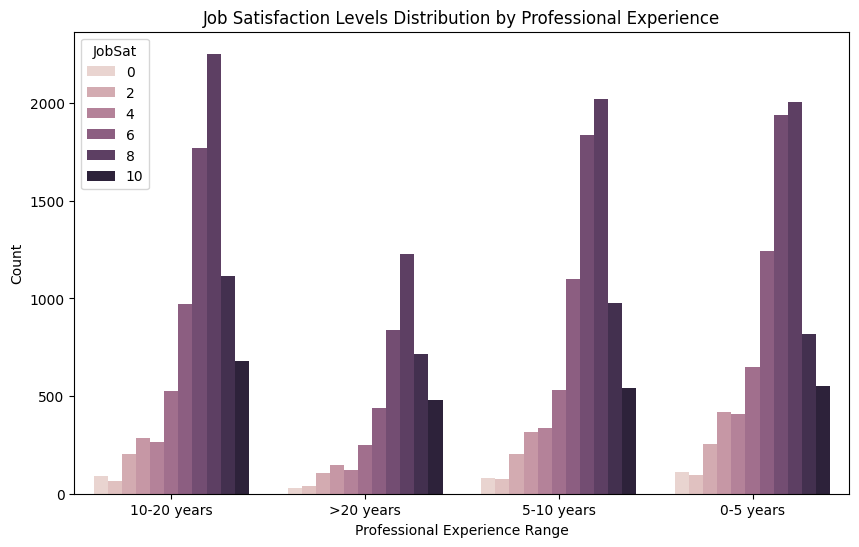

In [6]:
## Write your code here
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x ='ProExperienceRange', hue = 'JobSat')
plt.title('Job Satisfaction Levels Distribution by Professional Experience') 
plt.xlabel('Professional Experience Range')  
plt.ylabel('Count') 
plt.show()
#The JobSat distribution shows a concentration in the 6-9 range, with a peak at 7 and the highest count at 8, 
# indicating moderate to high satisfaction among most respondents.

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


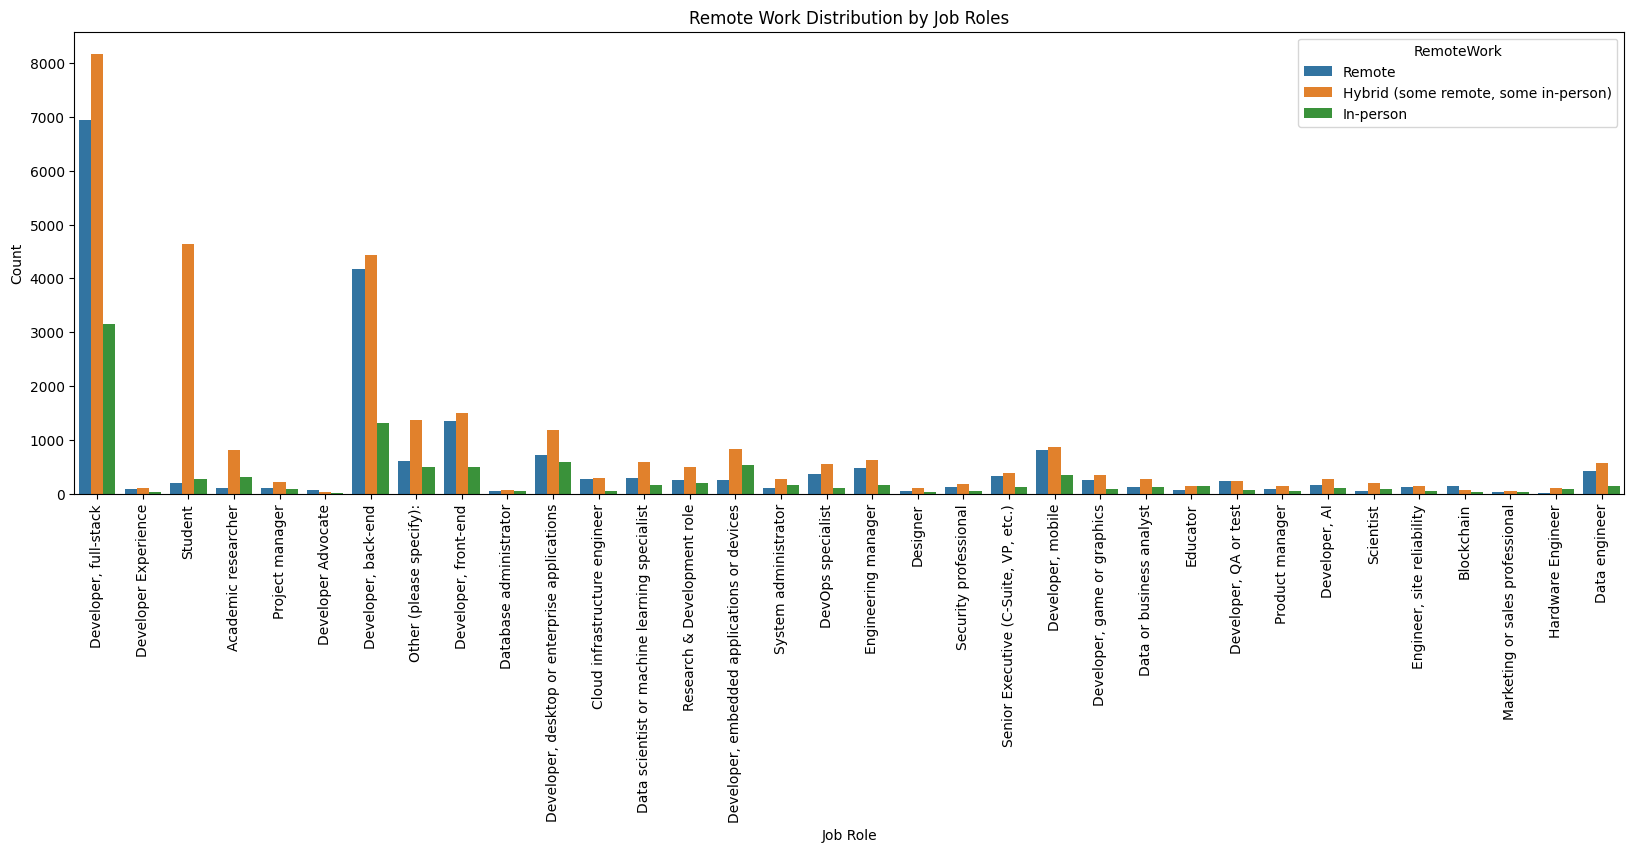

RemoteWork                                                            Hybrid (some remote, some in-person)  \
Employment                             DevType                                                               
Employed, full-time                    Academic researcher                                             324   
                                       Blockchain                                                       17   
                                       Cloud infrastructure engineer                                   220   
                                       Data engineer                                                   430   
                                       Data or business analyst                                        178   
...                                                                                                    ...   
Student, part-time;Employed, part-time Student                                                          23   
          

In [7]:
## Write your code here
plt.figure(figsize=(20, 6))
sns.countplot(x='DevType', hue='RemoteWork', data = df)
plt.title('Remote Work Distribution by Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

crosstab_remote_work = pd.crosstab(index=[df['Employment'], df['DevType']], columns=df['RemoteWork'])
crosstab_remote_work.style.format()
print(crosstab_remote_work)

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


/tmp/ipykernel_1127/1128342186.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['EachLanguageHaveWorkedWith'] = filtered_df['LanguageHaveWorkedWith'].str.split(';')


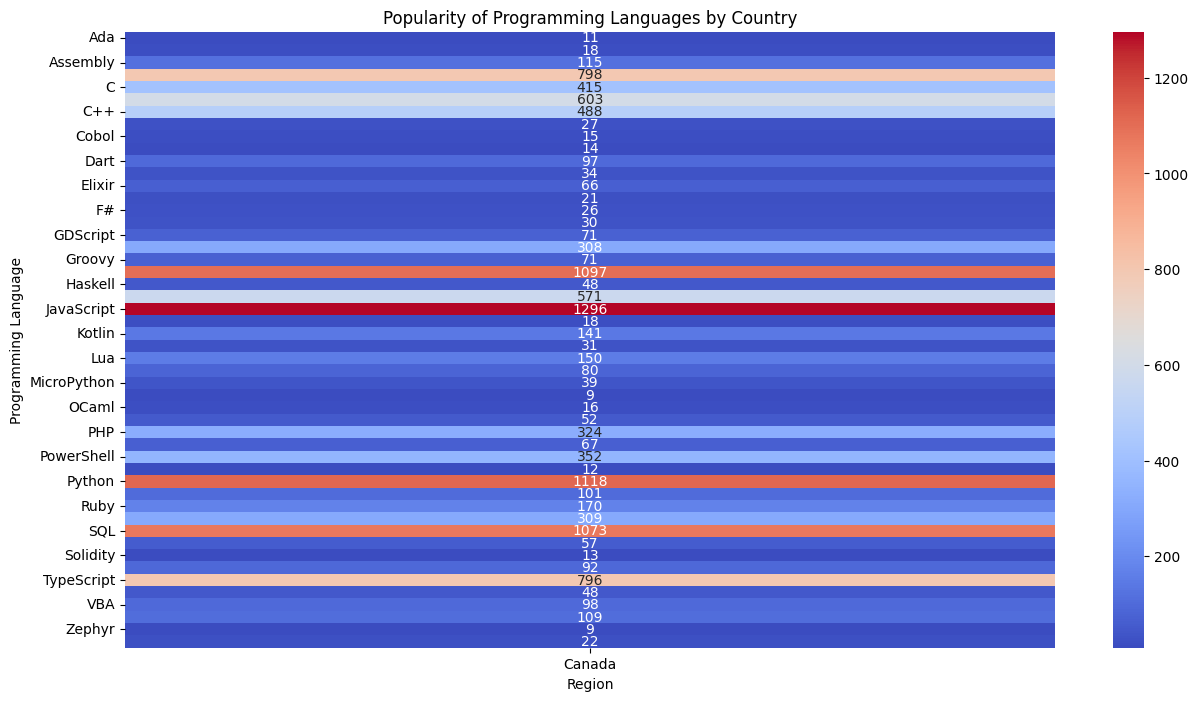

In [8]:
## Write your code here
#print(df['Country'].nunique())
#Use Canada as an example

filtered_df = df[df['Country'] == 'Canada']

# split the 'LanguageHaveWorkedWith' column by a ";" into individual languages
filtered_df['EachLanguageHaveWorkedWith'] = filtered_df['LanguageHaveWorkedWith'].str.split(';')
languages_list = filtered_df.explode('EachLanguageHaveWorkedWith')

# group by region and language to count how many times each language appears
language_counts_by_country = languages_list.groupby(['Country', 'EachLanguageHaveWorkedWith']).size().reset_index(name='Counts')
language_counts_by_country_sorted = language_counts_by_country.sort_values(by=['Country', 'Counts'], ascending=[True, False])

heatmap_data = language_counts_by_country.pivot_table(index='EachLanguageHaveWorkedWith', columns='Country', values='Counts', aggfunc='sum', fill_value=0)
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='d')
plt.title('Popularity of Programming Languages by Country')
plt.xlabel('Region')
plt.ylabel('Programming Language')
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


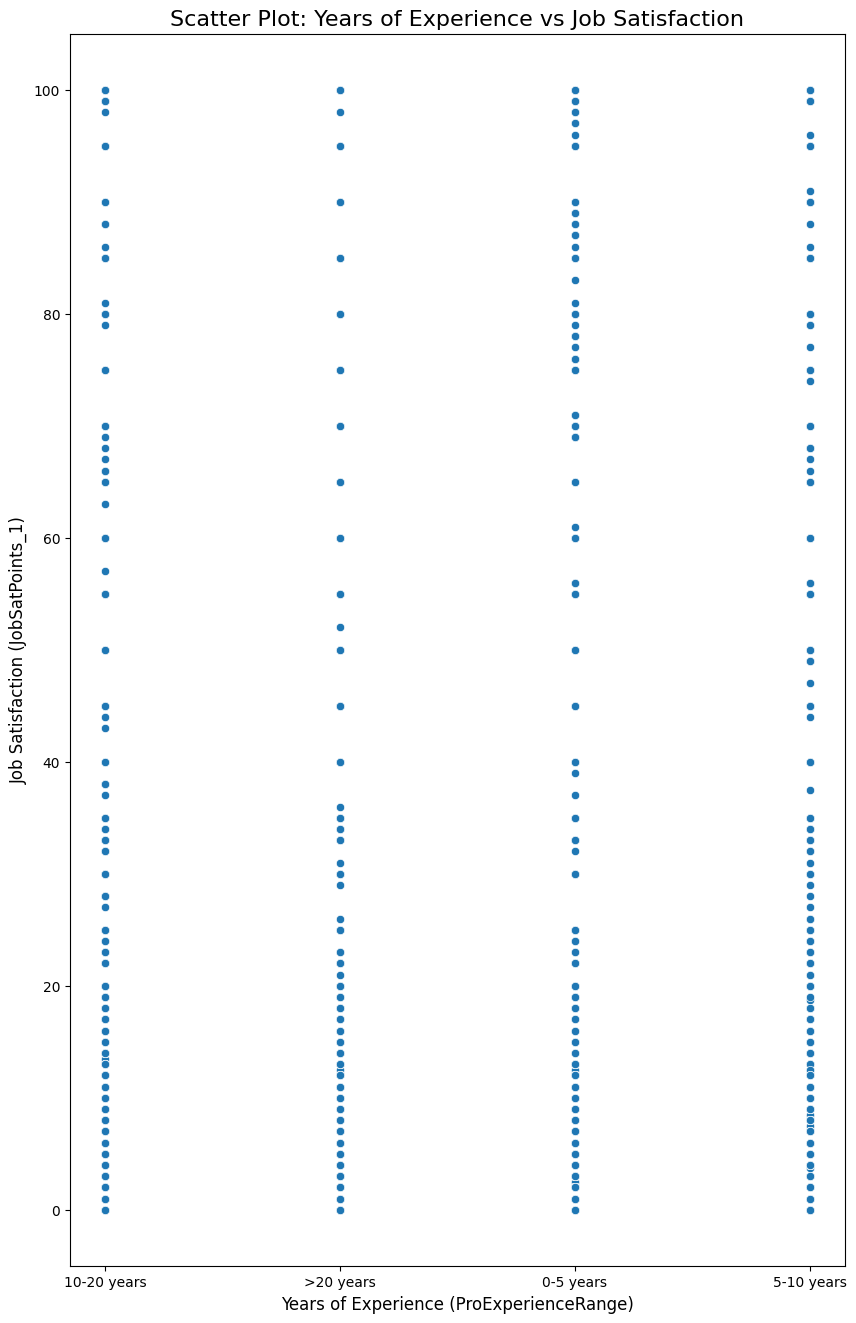

In [9]:
## Write your code here

df_filtered = df[df['ProExperienceRange'].notna() & df['JobSatPoints_1'].notna()]

plt.figure(figsize=(10,16))
sns.scatterplot(data=df_filtered, x='ProExperienceRange', y='JobSatPoints_1')
plt.title('Scatter Plot: Years of Experience vs Job Satisfaction', fontsize=16)
plt.xlabel('Years of Experience (ProExperienceRange)', fontsize=12)
plt.ylabel('Job Satisfaction (JobSatPoints_1)', fontsize=12)
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


EachEmployment                                      Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                4153   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      40369   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   25616   
Primary/elementary school                                          1953   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     4579   
Secondary school (e.g. American high school, Ge...                 6337   
Some college/university study without earning a...                13899   
Something else                                                     1827   

EachEmployment                                      Employed, part-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                2346   
Bachelor’s degree (B.A.,

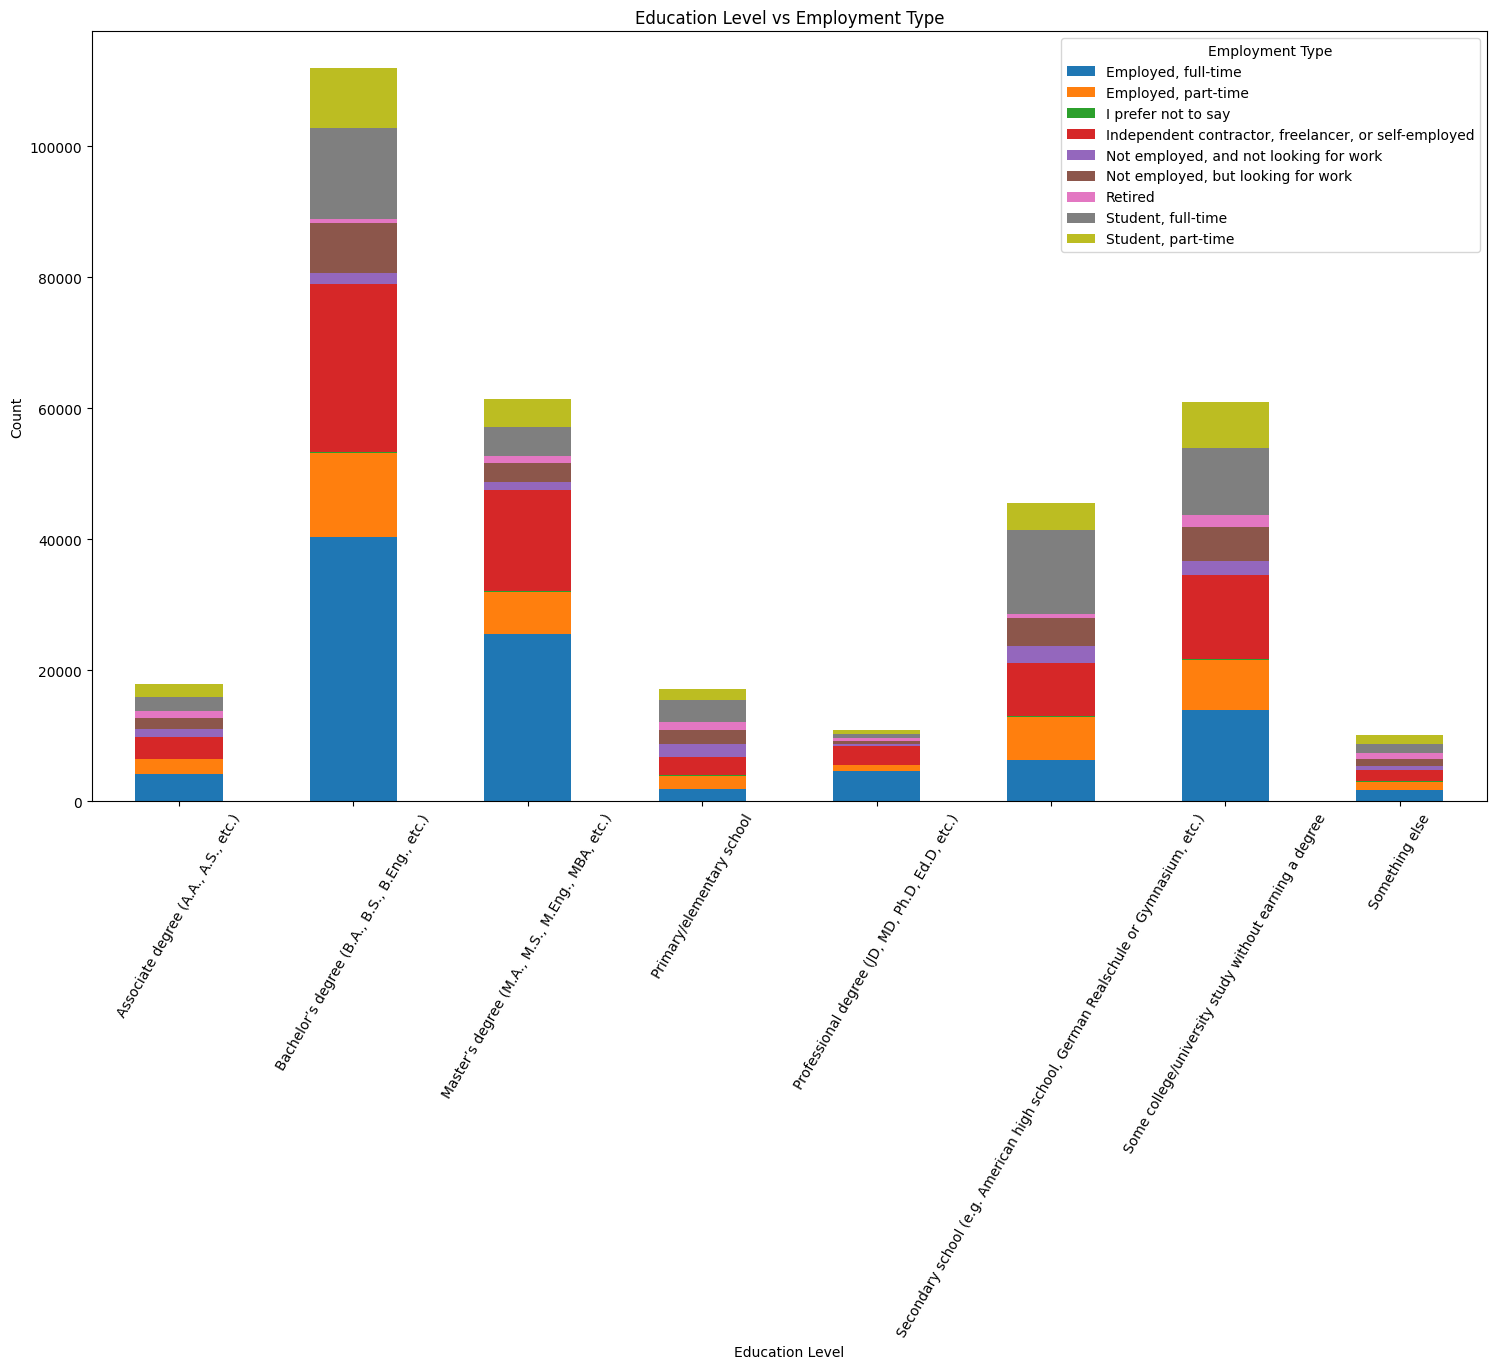

In [13]:
## Write your code here
df['EachEmployment'] = df['Employment'].str.split(';')
df = df.explode('EachEmployment')

edu_employment_ct = pd.crosstab(df['EdLevel'], df['EachEmployment'])
print(edu_employment_ct)

edu_employment_ct.plot(kind='bar', stacked=True, figsize=(18, 10))
plt.title('Education Level vs Employment Type')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Employment Type')
plt.xticks(rotation=60)
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here
df.to_csv('modified_dataset.csv', index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
